In [1]:
from keras.datasets import imdb

Using TensorFlow backend.


In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [4]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [5]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [6]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001), 
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [8]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

In [9]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [10]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [11]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

In [12]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 7s 454us/step - loss: 0.5300 - acc: 0.7698 - val_loss: 0.3974 - val_acc: 0.8688
Epoch 2/20
15000/15000 [==============================] - 3s 181us/step - loss: 0.3196 - acc: 0.8966 - val_loss: 0.3115 - val_acc: 0.8875
Epoch 3/20
15000/15000 [==============================] - 3s 181us/step - loss: 0.2300 - acc: 0.9275 - val_loss: 0.3093 - val_acc: 0.8757
Epoch 4/20
15000/15000 [==============================] - 3s 180us/step - loss: 0.1818 - acc: 0.9429 - val_loss: 0.2936 - val_acc: 0.8827
Epoch 5/20
15000/15000 [==============================] - 3s 210us/step - loss: 0.1479 - acc: 0.9530 - val_loss: 0.2797 - val_acc: 0.8875
Epoch 6/20
15000/15000 [==============================] - 3s 189us/step - loss: 0.1218 - acc: 0.9617 - val_loss: 0.2979 - val_acc: 0.8843
Epoch 7/20
15000/15000 [==============================] - 3s 182us/step - loss: 0.1002 - acc: 0.9711 - val_loss: 0.3025 - 

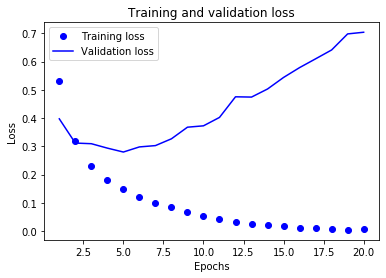

In [13]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

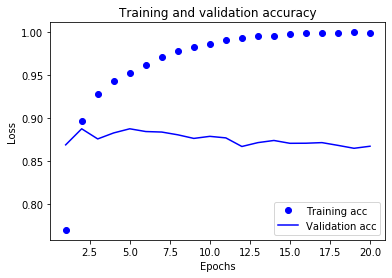

In [16]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [18]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 4s 162us/step - loss: 0.4435 - accuracy: 0.8189
Epoch 2/4
25000/25000 [==============================] - 3s 130us/step - loss: 0.2537 - accuracy: 0.9104
Epoch 3/4
25000/25000 [==============================] - 3s 130us/step - loss: 0.1941 - accuracy: 0.9308
Epoch 4/4
25000/25000 [==============================] - 7s 262us/step


In [19]:
results

[0.3254258848571777, 0.8730000257492065]

In [20]:
model.predict(x_test)

array([[0.13310269],
       [0.99971074],
       [0.6492263 ],
       ...,
       [0.08863536],
       [0.04066888],
       [0.5270175 ]], dtype=float32)

In [22]:
model = models.Sequential()
model.add(layers.Dense(1, activation='relu', input_shape=(10000,)))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)

results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 3s 110us/step - loss: 0.7459 - accuracy: 0.6624
Epoch 2/4
25000/25000 [==============================] - 2s 88us/step - loss: 0.3779 - accuracy: 0.8368
Epoch 3/4
25000/25000 [==============================] - 2s 87us/step - loss: 0.2961 - accuracy: 0.8638
Epoch 4/4
25000/25000 [==============================] - 3s 121us/step


In [23]:
results

[0.4100925183391571, 0.817359983921051]

In [37]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='mse',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=14, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/14
25000/25000 [==============================] - 4s 153us/step - loss: 0.1414 - accuracy: 0.8238
Epoch 2/14
25000/25000 [==============================] - 4s 153us/step - loss: 0.0714 - accuracy: 0.9114
Epoch 3/14
25000/25000 [==============================] - 4s 179us/step - loss: 0.0533 - accuracy: 0.9335
Epoch 4/14
25000/25000 [==============================] - 3s 128us/step - loss: 0.0429 - accuracy: 0.9476
Epoch 5/14
25000/25000 [==============================] - 3s 126us/step - loss: 0.0361 - accuracy: 0.9562
Epoch 6/14
25000/25000 [==============================] - 3s 130us/step - loss: 0.0306 - accuracy: 0.9638
Epoch 7/14
25000/25000 [==============================] - 3s 132us/step - loss: 0.0253 - accuracy: 0.9708
Epoch 8/14
25000/25000 [==============================] - 3s 129us/step - loss: 0.0227 - accuracy: 0.9742
Epoch 9/14
25000/25000 [==============================] - 3s 126us/step - loss: 0.0187 - accuracy: 0.9796
Epoch 10/14
25000/25000 [=====================

In [38]:
results

[0.12219951095014811, 0.8598799705505371]

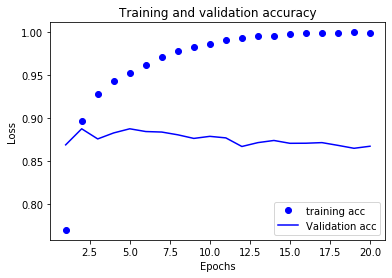

In [40]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()